# MOVIE RATING PREDICTION

In [44]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import seaborn as sns

import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [46]:
file_path = "C:/Users/PK/Desktop/datasets/IMDb Movies India.csv"
encodings = ['utf-8','latin1','iso-8859-1','cp1252']
for encoding in encodings:
    try:
        df = pd.read_csv(file_path,encoding = encoding)
        print(f"File uccessfully read with encoding: {encoding}")
        break
    except Exception as e:
        print(f"Failed with encoding {encoding}:{e}")
df.head()

Failed with encoding utf-8:'utf-8' codec can't decode byte 0xe9 in position 3: invalid continuation byte
File uccessfully read with encoding: latin1


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [48]:
df.shape

(15509, 10)

In [50]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [54]:
print(df.isnull().sum()/len(df)*100)

Name         0.000000
Year         3.404475
Duration    53.317429
Genre       12.102650
Rating      48.939326
Votes       48.932878
Director     3.385131
Actor 1     10.426204
Actor 2     15.371720
Actor 3     20.272100
dtype: float64


In [56]:
df.dropna(subset=['Duration'], inplace = True)
df = df[df.isnull().sum(axis=1).sort_values(ascending=False) <=5]

In [58]:
df.dropna(subset=['Rating', 'Votes'], inplace=True)

df['Director'].fillna('Unknown Director', inplace=True)

df['Genre'].fillna('Unknown Genre', inplace=True)

df['Actor 1'].fillna('Unknown Actor', inplace=True)
df['Actor 2'].fillna('Unknown Actor', inplace=True)
df['Actor 3'].fillna('Unknown Actor', inplace=True)


In [60]:
df['Year'] = df['Year'].str.replace(r'[()]', '', regex=True)
df['Duration'] = df['Duration'].str.replace(r' min', '', regex=True)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5851 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5851 non-null   object 
 1   Year      5851 non-null   object 
 2   Duration  5851 non-null   object 
 3   Genre     5851 non-null   object 
 4   Rating    5851 non-null   float64
 5   Votes     5851 non-null   object 
 6   Director  5851 non-null   object 
 7   Actor 1   5851 non-null   object 
 8   Actor 2   5851 non-null   object 
 9   Actor 3   5851 non-null   object 
dtypes: float64(1), object(9)
memory usage: 502.8+ KB


In [64]:
int_columns = ['Year', 'Duration']
df[int_columns] = df[int_columns].astype(int)
df['Votes'] = df['Votes'].str.replace(',', '').astype(int)

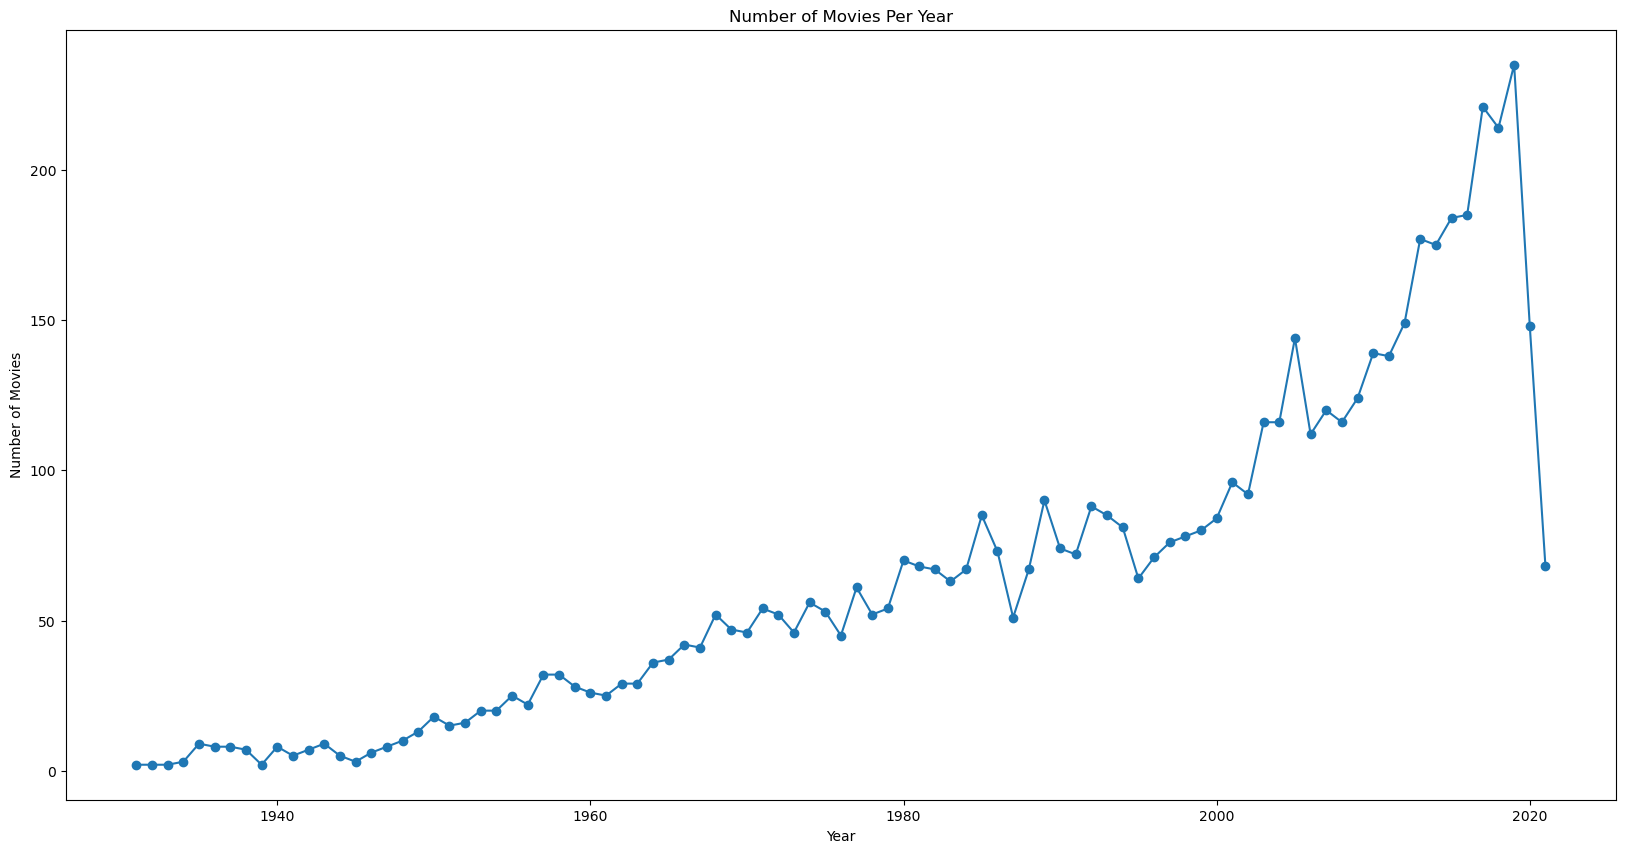

In [66]:
plt.figure(figsize=(20, 10))

year_counts = df['Year'].value_counts().sort_index()
years = year_counts.index

plt.plot(years, year_counts, marker='o' )

plt.title('Number of Movies Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')


plt.show()

In [68]:
genre_mean_rating = df.groupby('Genre')['Rating'].transform('mean')
df['Genre_mean_rating'] = genre_mean_rating

In [70]:
df['Director_encoded'] = df.groupby('Director')['Rating'].transform('mean')
df['Actor_encoded'] = df.groupby('Actor 1')['Rating'].transform('mean')

features = ['Year', 'Votes', 'Duration', 'Genre_mean_rating', 'Director_encoded', 'Actor_encoded']
X = df[features]
y = df['Rating']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R2 Score: {r2:.4f}")

Mean Squared Error: 0.5140
Mean Absolute Error: 0.5128
R2 Score: 0.7237


In [78]:
def predict_movie_rating():
    print("\n--- Enter Movie Details for Rating Prediction ---")

    year = int(input("Which year was the movie released?: "))
    votes = int(input("Number of votes the movie received: "))
    duration = int(input("Duration of the movie (in minutes): "))
    genre = input("What is the genre of the movie?: ")

    if not genre:
        genre = "Unknown Genre"

    director = input("Who is the director?: ")

    if not director:
        director = "Unknown Director"

    actor1 = input("Enter the name of Actor 1 (or press Enter to skip): ")
    actor2 = input("Enter the name of Actor 2 (or press Enter to skip): ")
    actor3 = input("Enter the name of Actor 3 (or press Enter to skip): ")

    if not actor1:
        actor1 = "Unknown Actor"
    if not actor2:
        actor2 = "Unknown Actor"
    if not actor3:
        actor3 = "Unknown Actor"

    actor1_rating = df.groupby('Actor 1')['Rating'].mean().get(actor1, df['Rating'].mean())
    actor2_rating = df.groupby('Actor 2')['Rating'].mean().get(actor2, df['Rating'].mean())
    actor3_rating = df.groupby('Actor 3')['Rating'].mean().get(actor3, df['Rating'].mean())
    actor_encoded = (actor1_rating + actor2_rating + actor3_rating) / 3

    new_data = pd.DataFrame({
        'Year': [year],
        'Votes': [votes],
        'Duration': [duration],
        'Genre_mean_rating': [df.groupby('Genre')['Rating'].mean().get(genre, df['Rating'].mean())],
        'Director_encoded': [df.groupby('Director')['Rating'].mean().get(director, df['Rating'].mean())],
        'Actor_encoded': [actor_encoded]
    })

    predicted_rating = lr.predict(new_data)
    return predicted_rating[0]

print(f"Predicted Rating for the movie: {predict_movie_rating():.2f}")



--- Enter Movie Details for Rating Prediction ---


Which year was the movie released?:  2019
Number of votes the movie received:  35
Duration of the movie (in minutes):  110
What is the genre of the movie?:  Comedy, Romance
Who is the director?:  Ovais khan
Enter the name of Actor 1 (or press Enter to skip):  
Enter the name of Actor 2 (or press Enter to skip):  ishita raj
Enter the name of Actor 3 (or press Enter to skip):  Siddhant kapoor


Predicted Rating for the movie: 6.02
